In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from devkit.dataset import DataCatalog
dc = DataCatalog()
targets = dc.load('probes_and_drugs_targets')
compounds = dc.load('probes_and_drugs_compounds')
targets

F:\git_repos\dev-kit\devkit\dataset\catalog.py:141: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path)


,pdid,name,target_name,gene_name,target_type,moa,human,activity_biochemical,activity_cell,probe,...,Reactome [LEVEL 1],Reactome [LEVEL 2],Reactome [LEVEL 3],Reactome [LEVEL 4],Reactome [LEVEL 5],Reactome [LEVEL 6],Reactome [LEVEL 7],Reactome [LEVEL 8],Reactome [LEVEL 9],Reactome [LEVEL 10]
0,PD000001,BAZ2-ICR,Chromatin remodeling regulator CECR2,CECR2,single protein,NaN,1,5.81,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PD000001,BAZ2-ICR,Bromodomain adjacent to zinc finger domain pro...,BAZ2A,single protein,inhibitor,1,6.96,NaN,1.0,...,Gene expression (Transcription),Epigenetic regulation of gene expression,Negative epigenetic regulation of rRNA expression,NoRC negatively regulates rRNA expression,NaN,NaN,NaN,NaN,NaN,NaN
2,PD000001,BAZ2-ICR,Bromodomain adjacent to zinc finger domain pro...,BAZ2B,single protein,inhibitor,1,6.77,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PD000002,I-BRD9,Chromatin remodeling regulator CECR2,CECR2,single protein,NaN,1,6.78,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PD000002,I-BRD9,CREB-binding protein,CREBBP,single protein,NaN,1,5.82,NaN,0.0,...,Disease,Infectious disease,Viral Infection Pathways,SARS-CoV Infections,SARS-CoV-2 Infection,SARS-CoV-2-host interactions,SARS-CoV-2 activates/modulates innate and adap...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190795,PD205557,PD205557,PRMT5/MEP50 complex,"PRMT5,WDR77",protein complex,NaN,0,NaN,5.97,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190796,PD205561,PD205561,Nucleosome-remodeling factor subunit BPTF,BPTF,single protein,NaN,1,5.78,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190797,PD205576,PD205576,Serine/threonine-protein kinase 17A,STK17A,single protein,NaN,1,5.01,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190798,PD205576,PD205576,Serine/threonine-protein kinase 17B,STK17B,single protein,NaN,1,5.68,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
probe_x_target = targets.groupby(['name','gene_name'])[['activity_biochemical','activity_cell']].agg(max).reset_index()
probe_x_target["max_pact"] = probe_x_target[['activity_biochemical','activity_cell']].max(axis=1)
probe_x_target = probe_x_target.dropna(subset=['max_pact'])
probe_x_target = probe_x_target.pivot(index='name', columns='gene_name', values='max_pact').fillna(0)
probe_x_target

C:\Users\ntrus\AppData\Local\Temp\ipykernel_36384\3051184843.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  probe_x_target = targets.groupby(['name','gene_name'])[['activity_biochemical','activity_cell']].agg(max).reset_index()


gene_name,100281352,100283632,1272966,17HSDCL,1A,5-HT4R,56K.02/CGD6_20,5HTR1D,6PGL,A085R,...,YWHAZ,ZACN,ZAP70,ZDHHC2,ZDHHC20,ZIPA,ZMCDPK1,ZMPSTE24,ZNF664,ZWF1
name,,,,,,,,,,,,,,,,,,,,,
(S)-nitro-Blebbistatin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3-Chloroamphetamine (hydrochloride),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.alpha.-hydroxy Paclitaxel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAF-CMK (trifluoroacetate salt),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
β-catenin-IN-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
β-cyano-L-Alanine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"γ-2-MSH (41-58), amide",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


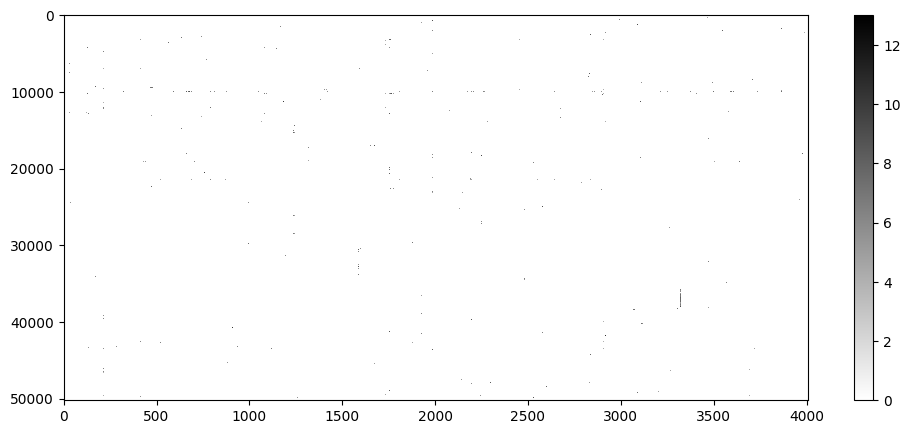

In [7]:
import matplotlib.pyplot as plt
X = probe_x_target.values
plt.figure(figsize=(12,5))
plt.imshow(X,cmap='binary',interpolation='nearest', aspect='auto')
plt.colorbar()

We want to set up an example usage of hit-expansion and target deduction using a chemogenomics screen. The ideal canddiate hit would be one with a few known protein targets

In [13]:
for k,v in targets['Reactome [LEVEL 6]'].value_counts().to_dict().items():
    print(k,v)

Serotonin receptors 3966
CYP2E1 reactions 3676
MAP kinase activation 2898
Activation of AMPK downstream of NMDARs 2714
Nuclear Envelope (NE) Reassembly 2434
SARS-CoV-2-host interactions 2380
Dopamine receptors 2326
Biosynthesis of maresin-like SPMs 2298
Adrenoceptors 2150
Anti-inflammatory response favouring Leishmania parasite infection 2041
Muscarinic acetylcholine receptors 1958
Regulation of TP53 Expression and Degradation 1750
EGFR Transactivation by Gastrin 1671
SARS-CoV-1-host interactions 1649
Adenosine P1 receptors 1578
Aromatic amines can be N-hydroxylated or N-dealkylated by CYP1A2 1367
Regulation of TP53 Activity through Phosphorylation 1304
Leishmania phagocytosis 1295
Sema4D induced cell migration and growth-cone collapse 1158
Homologous DNA Pairing and Strand Exchange 1145
Late SARS-CoV-2 Infection Events 997
PI3K Cascade 993
Loss of proteins required for interphase microtubule organization from the centrosome 981
Histamine receptors 914
G-protein activation 884
Stabiliz